# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are constructed recursively by starting with the full dataset, and at each step, we find the best splitof the data on a feature that minimizes a loss function.
2. Trees handle non linearity naturally by making piecewise splits. Linear models assume a global straight line between inputs and outputs.
3. Because Gini index measures impurity. A low Gini means the node is mostly pure.
4. Trees overfit if allowed to grow unchecked. Trees will split until each leaf perfectly fits a very small number of training examples.
5. False, because tress perform well both categorical and continuous features.
6. Because binary splits are simpler to maximize and more flexible.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

Best min_samples_leaf: 5
Best Test R²: 0.8228


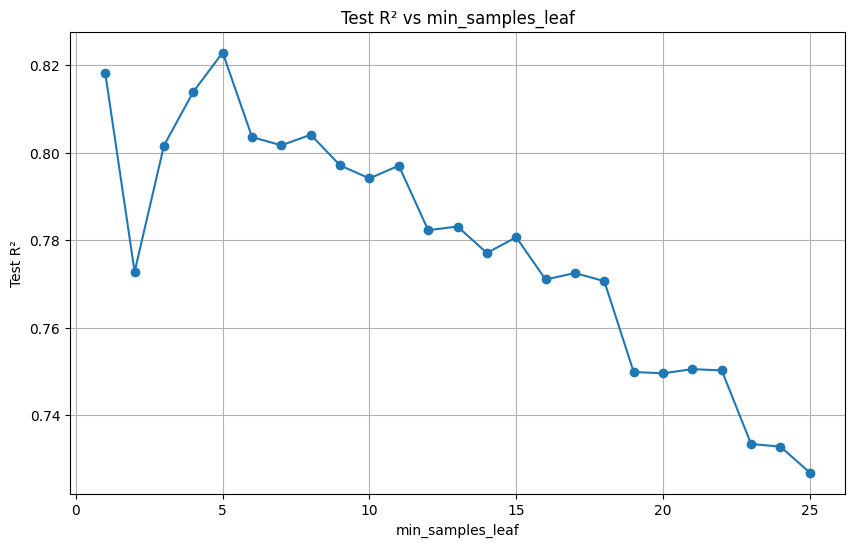

Final Tree Test RMSE: 142545.56
Final Tree Test R²: 0.823


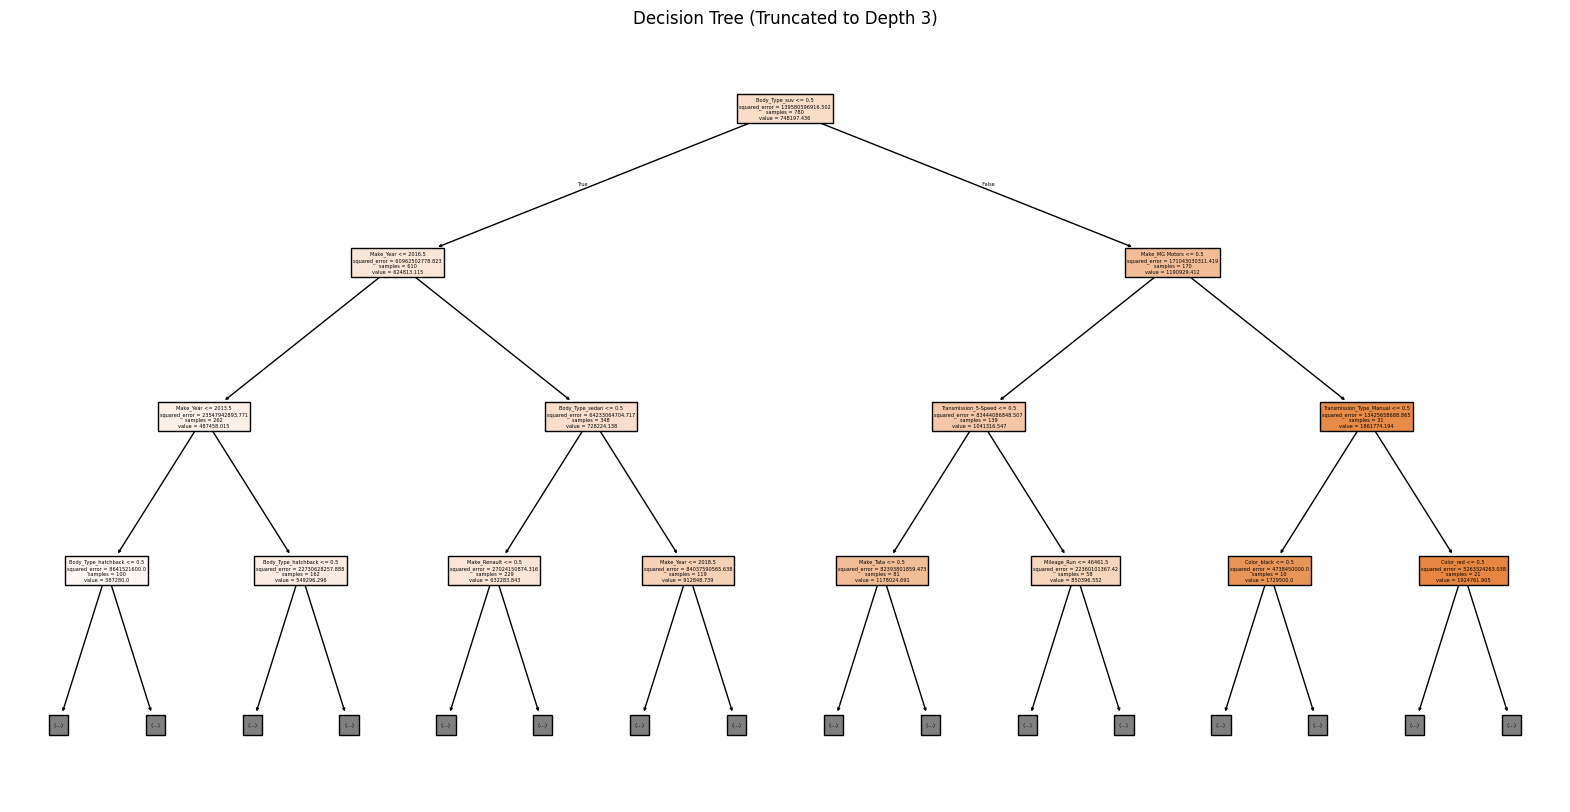

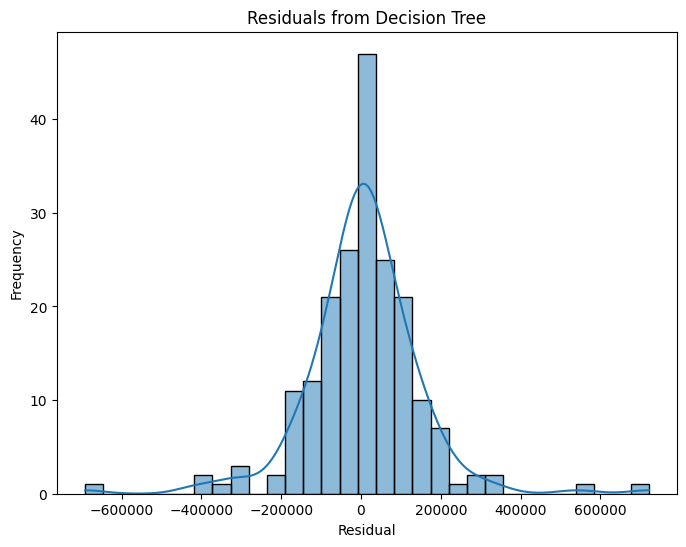

Mean of residuals: 5079.0006
Linear Model Test RMSE: 143575.20
Linear Model Test R²: 0.820


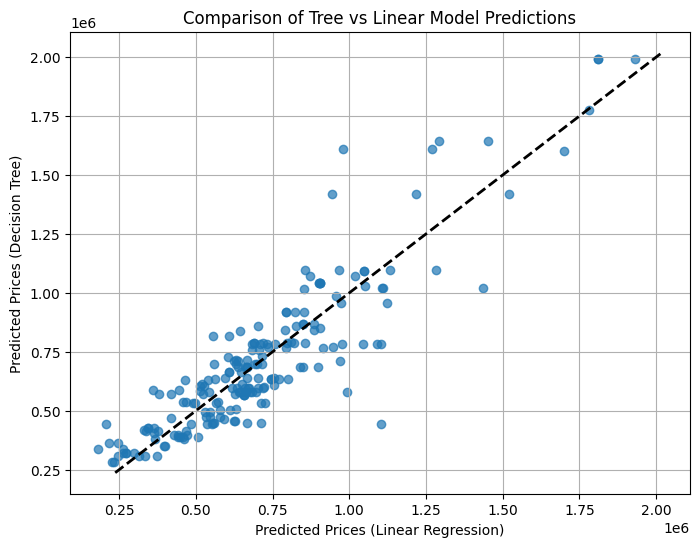

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
import seaborn as sns


file_path = 'cars_hw.csv'
cars = pd.read_csv(file_path)
cars.head()

if 'Unnamed: 0' in cars.columns:
    cars = cars.drop(columns=['Unnamed: 0'])

categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
cars_encoded = pd.get_dummies(cars, columns=categorical_vars, drop_first=True)

X = cars_encoded.drop(columns=['Price'])
y = cars_encoded['Price']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

r2_scores = []

for leaf_size in range(1, 26):
    tree = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((leaf_size, r2))

r2_df = pd.DataFrame(r2_scores, columns=['min_samples_leaf', 'Test_R2'])

best_leaf = r2_df.loc[r2_df['Test_R2'].idxmax(), 'min_samples_leaf']
best_r2 = r2_df['Test_R2'].max()

print(f"Best min_samples_leaf: {best_leaf}")
print(f"Best Test R²: {best_r2:.4f}")

plt.figure(figsize=(10,6))
plt.plot(r2_df['min_samples_leaf'], r2_df['Test_R2'], marker='o')
plt.title('Test R² vs min_samples_leaf')
plt.xlabel('min_samples_leaf')
plt.ylabel('Test R²')
plt.grid(True)
plt.show()

final_tree = DecisionTreeRegressor(min_samples_leaf=int(best_leaf), random_state=42)
final_tree.fit(X_train, y_train)

y_test_pred_tree = final_tree.predict(X_test)


tree_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_tree))
tree_test_r2 = r2_score(y_test, y_test_pred_tree)

print(f"Final Tree Test RMSE: {tree_test_rmse:.2f}")
print(f"Final Tree Test R²: {tree_test_r2:.3f}")

plt.figure(figsize=(20,10))
plot_tree(final_tree, filled=True, max_depth=3, feature_names=X.columns)
plt.title('Decision Tree (Truncated to Depth 3)')
plt.show()

residuals_tree = y_test - y_test_pred_tree

plt.figure(figsize=(8,6))
sns.histplot(residuals_tree, kde=True)
plt.title('Residuals from Decision Tree')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()


print(f"Mean of residuals: {residuals_tree.mean():.4f}")


# Train linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_test_pred_linear = linear_model.predict(X_test)

# Evaluation
linear_test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
linear_test_r2 = r2_score(y_test, y_test_pred_linear)

print(f"Linear Model Test RMSE: {linear_test_rmse:.2f}")
print(f"Linear Model Test R²: {linear_test_r2:.3f}")

plt.figure(figsize=(8,6))
plt.scatter(y_test_pred_linear, y_test_pred_tree, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Predicted Prices (Linear Regression)')
plt.ylabel('Predicted Prices (Decision Tree)')
plt.title('Comparison of Tree vs Linear Model Predictions')
plt.grid(True)
plt.show()




**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

In [10]:
import pandas as pd

file_path = 'Breast Cancer METABRIC.csv'
breast_cancer = pd.read_csv(file_path)
breast_cancer.head()
print(f"Number of observations (rows): {breast_cancer.shape[0]}")
print(f"Number of variables (columns): {breast_cancer.shape[1]}")

# Print first few rows
print("\nFirst few rows of the dataset:")
print(breast_cancer.head())

Number of observations (rows): 2509
Number of variables (columns): 34

First few rows of the dataset:
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subt

Observations = 2509 and variables = 34

In [11]:
# 2.
numeric_features = ['Tumor Size', 'Lymph nodes examined positive', 'Age at Diagnosis']
categorical_features = ['Tumor Stage', 'Chemotherapy', 'Cancer Type Detailed']

data = breast_cancer[numeric_features + categorical_features]

print("Missing values per column:")
print(data.isnull().sum())

data = data.dropna()

data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

X = data_encoded.copy()

print("\nFeature Matrix X Shape:", X.shape)
print("\nFirst few rows of X:")
print(X.head())


Missing values per column:
Tumor Size                       149
Lymph nodes examined positive    266
Age at Diagnosis                  11
Tumor Stage                      721
Chemotherapy                     529
Cancer Type Detailed               0
dtype: int64

Feature Matrix X Shape: (1400, 14)

First few rows of X:
   Tumor Size  Lymph nodes examined positive  Age at Diagnosis  \
0        22.0                           10.0             75.65   
1        10.0                            0.0             43.19   
2        15.0                            1.0             48.87   
3        25.0                            3.0             47.68   
4        40.0                            8.0             76.97   

   Tumor Stage_1.0  Tumor Stage_2.0  Tumor Stage_3.0  Tumor Stage_4.0  \
0            False             True            False            False   
1             True            False            False            False   
2            False             True            False            

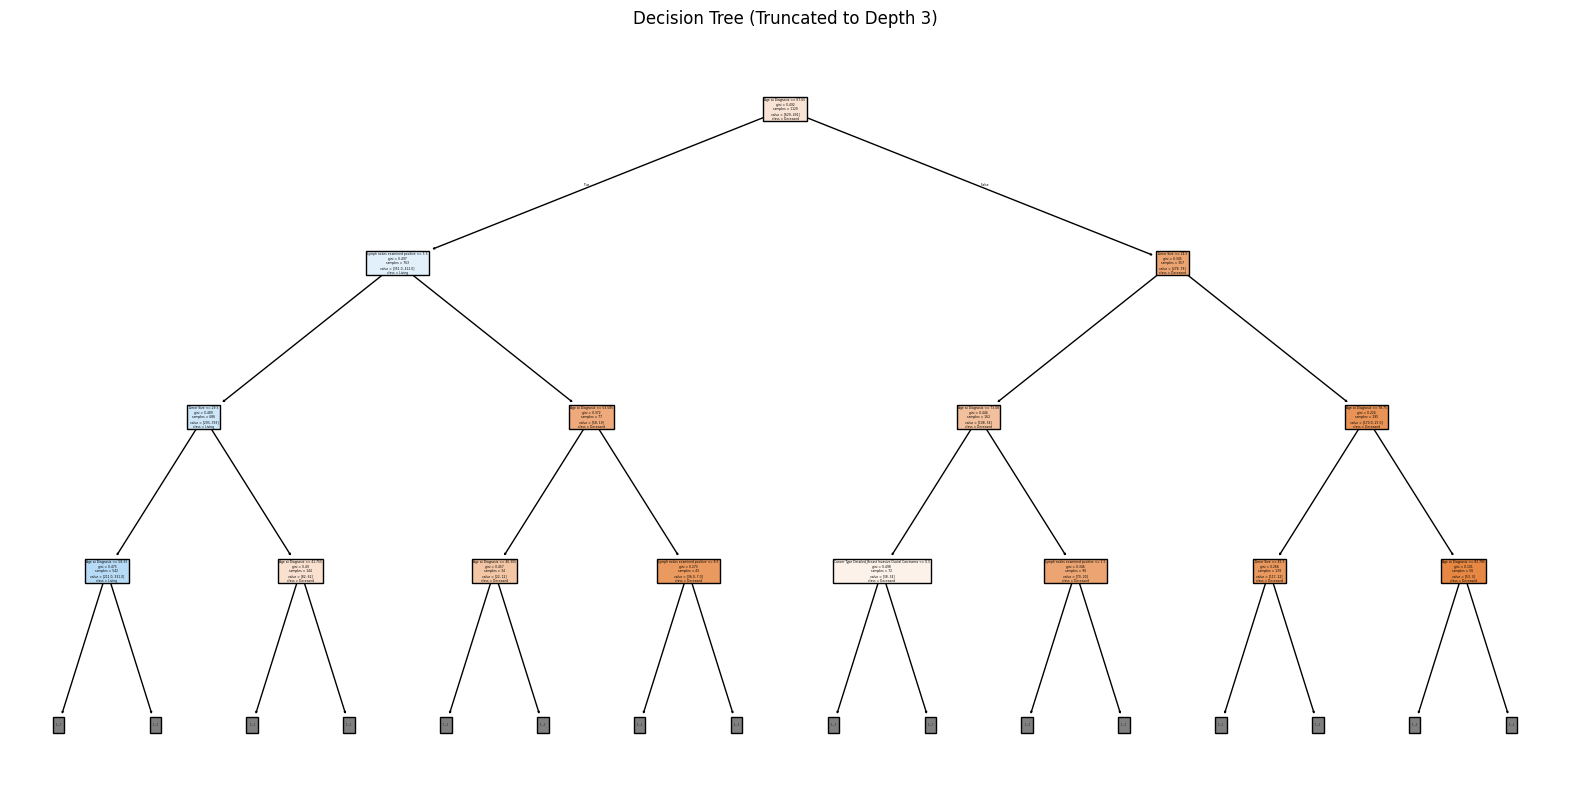


Confusion Matrix:
[[123  38]
 [ 49  70]]

Accuracy: 0.6893


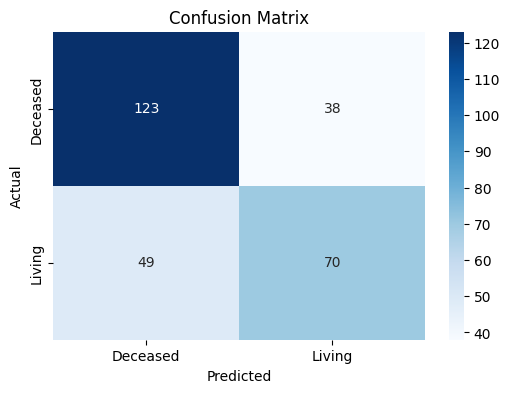

In [12]:
# 3.
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


full_data = breast_cancer[numeric_features + categorical_features + ['Overall Survival Status']]
full_data = full_data.dropna()

X = pd.get_dummies(full_data[numeric_features + categorical_features], drop_first=True)
y = full_data['Overall Survival Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tree_model = DecisionTreeClassifier(min_samples_leaf=10, random_state=42)
tree_model.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(tree_model, filled=True, feature_names=X.columns, class_names=tree_model.classes_, max_depth=3)
plt.title('Decision Tree (Truncated to Depth 3)')
plt.show()

y_pred = tree_model.predict(X_test)

conf_mat = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:")
print(conf_mat)
print(f"\nAccuracy: {acc:.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=tree_model.classes_, yticklabels=tree_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Accuracy shows overall model correctness on the test set.

In [13]:
tn, fp, fn, tp = conf_mat.ravel()

tpr = tp / (tp + fn)

tnr = tn / (tn + fp)

print(f"True Positive Rate (TPR / Sensitivity): {tpr:.4f}")
print(f"True Negative Rate (TNR / Specificity): {tnr:.4f}")

if tpr > tnr:
    print("\nThe model performs better in sensitivity (TPR is higher).")
elif tnr > tpr:
    print("\nThe model performs better in specificity (TNR is higher).")
else:
    print("\nThe model performs equally in sensitivity and specificity.")


True Positive Rate (TPR / Sensitivity): 0.5882
True Negative Rate (TNR / Specificity): 0.7640

The model performs better in specificity (TNR is higher).


Best min_samples_leaf: 92
Best Test R²: 0.1219


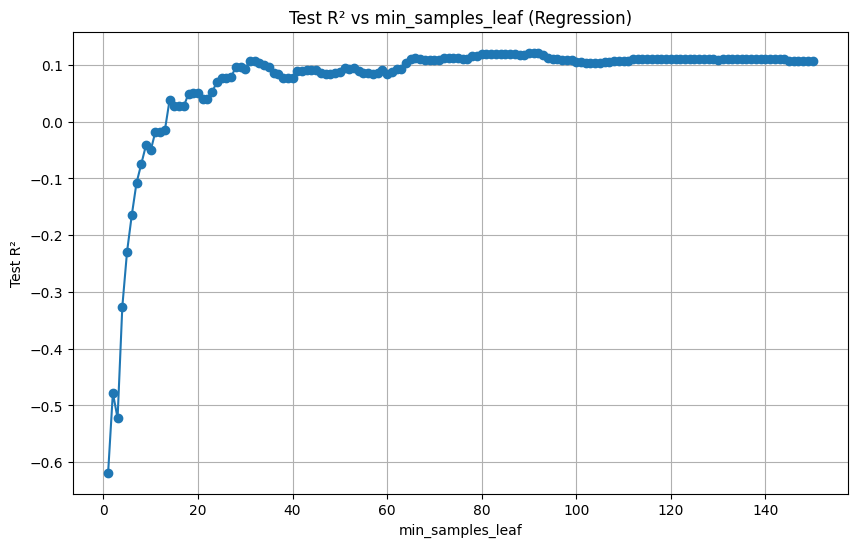

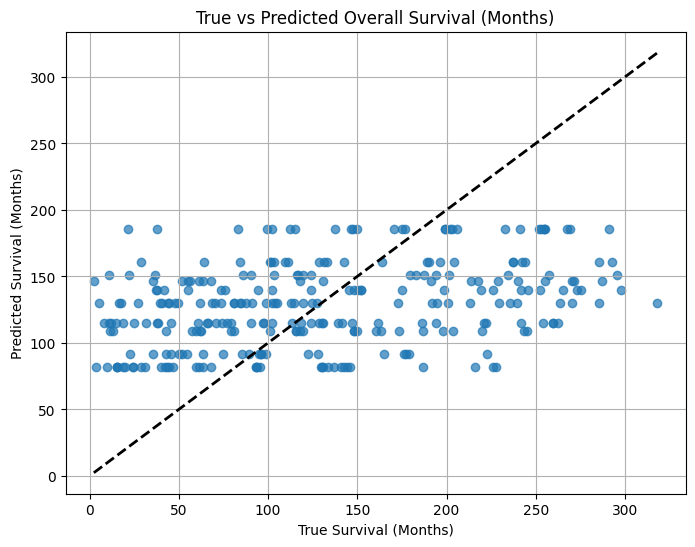

In [14]:
from sklearn.tree import DecisionTreeRegressor


full_data_reg = breast_cancer[numeric_features + categorical_features + ['Overall Survival (Months)']]
full_data_reg = full_data_reg.dropna()

X_reg = pd.get_dummies(full_data_reg[numeric_features + categorical_features], drop_first=True)
y_reg = full_data_reg['Overall Survival (Months)']

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

r2_scores_reg = []

for leaf_size in range(1, 151):
    tree_reg = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=42)
    tree_reg.fit(X_train_reg, y_train_reg)
    y_pred_reg = tree_reg.predict(X_test_reg)
    r2 = r2_score(y_test_reg, y_pred_reg)
    r2_scores_reg.append((leaf_size, r2))

r2_reg_df = pd.DataFrame(r2_scores_reg, columns=['min_samples_leaf', 'Test_R2'])
best_leaf_reg = r2_reg_df.loc[r2_reg_df['Test_R2'].idxmax(), 'min_samples_leaf']
best_r2_reg = r2_reg_df['Test_R2'].max()

print(f"Best min_samples_leaf: {best_leaf_reg}")
print(f"Best Test R²: {best_r2_reg:.4f}")

plt.figure(figsize=(10,6))
plt.plot(r2_reg_df['min_samples_leaf'], r2_reg_df['Test_R2'], marker='o')
plt.title('Test R² vs min_samples_leaf (Regression)')
plt.xlabel('min_samples_leaf')
plt.ylabel('Test R²')
plt.grid(True)
plt.show()

final_tree_reg = DecisionTreeRegressor(min_samples_leaf=int(best_leaf_reg), random_state=42)
final_tree_reg.fit(X_train_reg, y_train_reg)
y_test_pred_reg = final_tree_reg.predict(X_test_reg)

plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_test_pred_reg, alpha=0.7)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'k--', lw=2)
plt.title('True vs Predicted Overall Survival (Months)')
plt.xlabel('True Survival (Months)')
plt.ylabel('Predicted Survival (Months)')
plt.grid(True)
plt.show()


**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?